In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# 1. Load the dataset
df = pd.read_csv('/content/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-14,124.239998,125.699997,123.500000,123.830002,123.830002,3923000
1,2010-06-15,123.199997,126.919998,122.500000,126.839996,126.839996,4541000
2,2010-06-16,125.389999,127.980003,125.360001,126.900002,126.900002,3964300
3,2010-06-17,126.739998,127.800003,124.690002,125.889999,125.889999,3479000
4,2010-06-18,126.480003,127.480003,125.070000,125.830002,125.830002,3836000


In [4]:
# 2. Preprocess: Create a target 'Decision' (1 if price goes up tomorrow, 0 if not)
# This converts the regression data into a classification problem like the Iris/Golf examples
df['Decision'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df = df.dropna() # Remove the last row which has no 'tomorrow' value

In [5]:
# 3. Define Features (X) and Target (y)
# We use Open, High, Low, Close, and Volume as features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features].values
y = df['Decision'].values

In [6]:
# 4. Split data (90% for training, 10% for testing as per the notebook example)
tSize = int(X.shape[0] * 0.9)
print(f"Training set size: {tSize}")

X_train = X[0:tSize, :]
y_train = y[0:tSize]

X_test = X[tSize:, :]
y_test = y[tSize:]

Training set size: 1812


In [7]:
# 5. Initialize and train the Decision Tree Classifier
# We set a max_depth to keep the visualization readable
clf = DecisionTreeClassifier(max_depth=3)

# Train decision tree on training set
clf = clf.fit(X_train, y_train)

In [8]:
# 6. Predict values on testing set
y_pred = clf.predict(X_test)

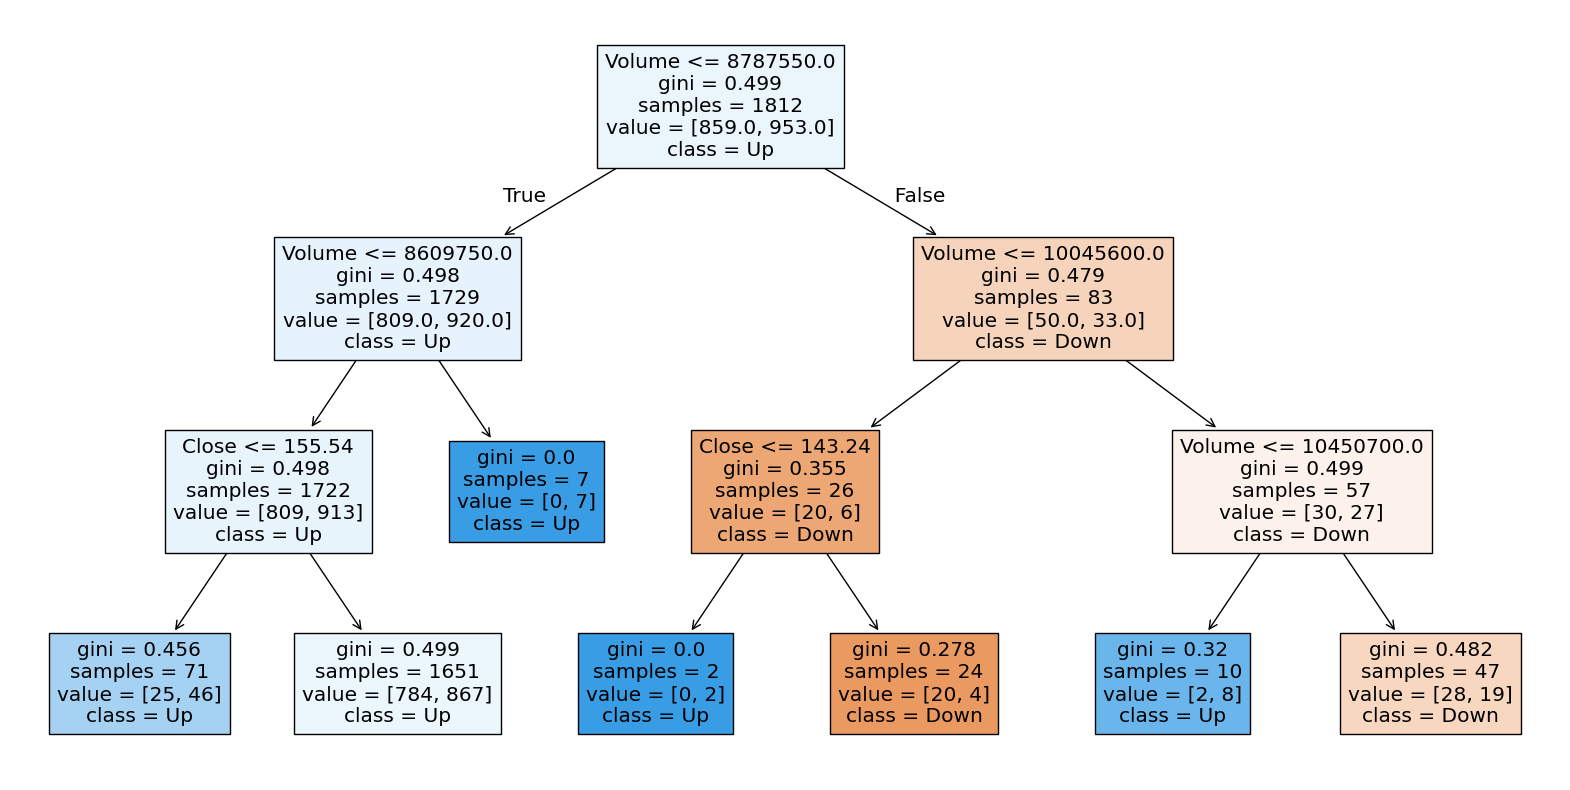

In [9]:
# 7. Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=features, class_names=['Down', 'Up'], filled=True)
plt.savefig('decision_tree_amzn.png')

In [10]:
# 8. Evaluate the model
print("Confusion matrix results:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report")
print(classification_report(y_test, y_pred))

Confusion matrix results:
[[  4  78]
 [  8 112]]

Classification report
              precision    recall  f1-score   support

           0       0.33      0.05      0.09        82
           1       0.59      0.93      0.72       120

    accuracy                           0.57       202
   macro avg       0.46      0.49      0.40       202
weighted avg       0.49      0.57      0.46       202



In [11]:
!pip install chefboost

In [12]:
from chefboost import Chefboost as chef
import pandas as pd

In [14]:
#1. Load the dataset
df=pd.read_csv('/content/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-14,124.239998,125.699997,123.500000,123.830002,123.830002,3923000
1,2010-06-15,123.199997,126.919998,122.500000,126.839996,126.839996,4541000
2,2010-06-16,125.389999,127.980003,125.360001,126.900002,126.900002,3964300
3,2010-06-17,126.739998,127.800003,124.690002,125.889999,125.889999,3479000
4,2010-06-18,126.480003,127.480003,125.070000,125.830002,125.830002,3836000


In [15]:
# 2. Preprocessing for Classification (Exactly like the notebook style)
# We create a 'Decision' column: 'Yes' if the price goes up tomorrow, 'No' if it goes down.
# This converts the regression data into a classification problem suitable for C5.0.
df['Decision'] = (df['Close'].shift(-1) > df['Close']).map({True: 'Yes', False: 'No'})

# Remove the last row (which has no "tomorrow" price) and drop non-predictive columns
df = df.dropna()
df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Decision']]

In [16]:
# 3. Configuration for C5.0/C4.5
# Chefboost uses 'C4.5' as the algorithm for Quinlan's Gain Ratio logic.
config = {'algorithm': 'C4.5'}

In [17]:
# 4. Train the model
# Note: Chefboost will generate a 'rules' folder in your directory containing the tree logic.
model = chef.fit(df, config)

26-01-19 01:23:06 - C4.5 tree is going to be built...
26-01-19 01:23:07 - -------------------------
26-01-19 01:23:07 - finished in 1.361274003982544 seconds
26-01-19 01:23:07 - -------------------------
26-01-19 01:23:07 - Evaluate train set
26-01-19 01:23:07 - -------------------------
26-01-19 01:23:07 - Accuracy: 53.37636544190666% on 2014 instances
26-01-19 01:23:07 - Labels: ['Yes' 'No']
26-01-19 01:23:07 - Confusion matrix: [[1073, 939], [0, 2]]
26-01-19 01:23:07 - Precision: 53.33%, Recall: 100.0%, F1: 69.5624%


In [18]:
# 5. Prediction for a custom instance (Example: using values from a recent day)
# Format: [Open, High, Low, Close, Volume]
test_instance = [1589.89, 1589.89, 1575.25, 1581.40, 2147600]
prediction = chef.predict(model, test_instance)

print(f"The C5.0 model predicts the stock will move: {prediction}")

The C5.0 model predicts the stock will move: Yes


In [19]:
with open('outputs/rules/rules.py', 'r') as f:
    print(f.read())

def findDecision(obj): #obj[0]: Open, obj[1]: High, obj[2]: Low, obj[3]: Close, obj[4]: Volume
   # {"feature": "Open", "instances": 2014, "metric_value": 0.9969, "depth": 1}
   if obj[0]>105.93:
      # {"feature": "Volume", "instances": 2013, "metric_value": 0.9968, "depth": 2}
      if obj[4]>984400:
         # {"feature": "High", "instances": 2012, "metric_value": 0.9968, "depth": 3}
         if obj[1]>111.290001:
            # {"feature": "Low", "instances": 2011, "metric_value": 0.9968, "depth": 4}
            if obj[2]>106.010002:
               # {"feature": "Close", "instances": 2010, "metric_value": 0.9969, "depth": 5}
               if obj[3]>109.260002:
                  return 'Yes'
               elif obj[3]<=109.260002:
                  return 'Yes'
               else:
                  return 'Yes'
            elif obj[2]<=106.010002:
               return 'Yes'
            else:
               return 'Yes'
         elif obj[1]<=111.290001:
            return 'Yes'
  

The Evolution: C4.5 to C5.0
Both algorithms were developed by Ross Quinlan. While C4.5 is the standard open-source algorithm that introduced the Gain Ratio to prevent bias toward high-cardinality attributes, C5.0 is the significantly optimized successor designed for industrial-scale data.

**1. Performance and Efficiency**

   Speed: C5.0 is many times faster than C4.5. In large datasets like stock market history, C5.0 can build a model in seconds where C4.5 might take minutes.

   Memory: C5.0 is highly optimized to use much less RAM. This allows it to handle much larger datasets than C4.5 without crashing the environment.

**2. Model Accuracy and Complexity**

   Boosting: This is the biggest functional difference. C5.0 supports boosting, which generates multiple trees and combines their results. This significantly increases accuracy compared to the single-tree approach of C4.5.

   Pruning: Both use post-pruning, but C5.0 is more aggressive at simplifying the tree, resulting in smaller, more readable models that often generalize better to new data.

**3. Advanced Features**

   Winnowing: C5.0 has a built-in "Winnowing" feature. It automatically screens your attributes and discards the ones that are irrelevant (noise) before building the tree. This is very useful for stock data where some technical indicators might not actually help prediction.

   Misclassification Costs: In C5.0, you can tell the model that a "False Positive" is more expensive than a "False Negative." In trading, for example, a "False Buy" signal might be more costly than a "Missed Buy" signal.

   Data Types: C5.0 handles dates, timestamps, and missing values more gracefully than the original C4.5 logic.